In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.transpiler import InstructionProperties
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler import PassManager

service = QiskitRuntimeService()

In [2]:
def get_ghz_circ_static(num_qubit):
    if num_qubit%2==1:                                                     #odd no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-1)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-1):
            qc.cx(i,i+1)
            qc.cx(num_qubit-i-1,num_qubit-i-2)
        

    else:                                                                    #even no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-2)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-2):
            qc.cx(i,i+1)
            qc.cx(num_qubit-1-i-1,num_qubit-i-3)
        qc.cx(num_qubit-2,num_qubit-1)
    for i in range(num_qubit):
        qc.measure(qr[i],cr2[i])
    return qc

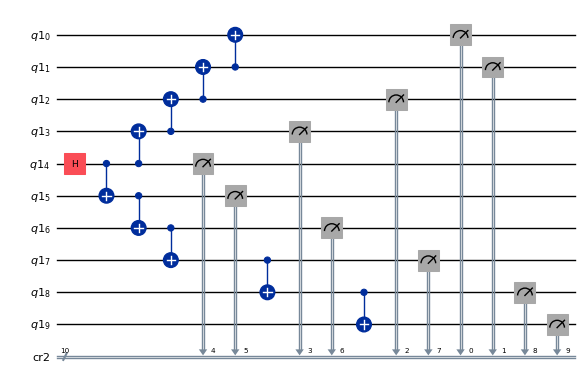

In [3]:
qc = get_ghz_circ_static(num_qubit=10)
qc.draw("mpl",scale=0.5)


In [4]:
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

def get_ghz_circ_dynamic_2(num_qubit):
    qc=get_ghz_circ_static(num_qubit)
    aer_sim = AerSimulator()
    pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=2, init_method="qubit_reuse")
    pm_1 = generate_preset_pass_manager(backend=aer_sim, optimization_level=2, init_method="qubit_reuse_1")
    pm_2 = generate_preset_pass_manager(backend=aer_sim, optimization_level=2, init_method="qubit_reuse_2")
    pm_3 = generate_preset_pass_manager(backend=aer_sim, optimization_level=2, init_method="qubit_reuse_3")
    pm_4 = generate_preset_pass_manager(backend=aer_sim, optimization_level=2, init_method="qubit_reuse_4")
    pm_5 = generate_preset_pass_manager(backend=aer_sim, optimization_level=2, init_method="qubit_reuse_5")
    transpiled_qc = pm.run(qc)
    transpiled_qc_1 = pm_1.run(qc)
    transpiled_qc_2 = pm_2.run(qc)
    transpiled_qc_3 = pm_3.run(qc)
    transpiled_qc_4 = pm_4.run(qc)
    transpiled_qc_5 = pm_5.run(qc)
    
    return transpiled_qc, transpiled_qc_1, transpiled_qc_2, transpiled_qc_3, transpiled_qc_4, transpiled_qc_5

In [5]:
min_qubit=13
max_num_qubit=17
copies=6

#qc_list_dynamic_1=[]
#qc_list_dynamic_2=[]
#qc_list_static=[]
#observables=[]

qc_list=[]
num_qubit_list=list(range(min_qubit,max_num_qubit+1))
for num_qubit in num_qubit_list:
    for i in range(copies):
        qc_list.append(get_ghz_circ_static(num_qubit))               # no reuse
        #qc_list.append(get_ghz_circ_dynamic_1(num_qubit))
        qc_list.append(get_ghz_circ_dynamic_2(num_qubit)[0])          # normal reuse
        qc_list.append(get_ghz_circ_dynamic_2(num_qubit)[1])         # modified reuse 1
        qc_list.append(get_ghz_circ_dynamic_2(num_qubit)[2])         # modified reuse 2
        qc_list.append(get_ghz_circ_dynamic_2(num_qubit)[3])         # modified reuse 3
        qc_list.append(get_ghz_circ_dynamic_2(num_qubit)[4])         # modified reuse 4
        qc_list.append(get_ghz_circ_dynamic_2(num_qubit)[5])         # modified reuse 5
print(num_qubit_list)

threshold received in plugin is 1
threshold received in plugin is 1
threshold received in plugin is 1
threshold received in plugin is 1
threshold received in plugin is 1
threshold received in Greedy is 1
classical registers are [ClassicalRegister(13, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(13, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(13, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(13, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(13, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(13, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(13, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(13, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(13, 'cr2')]
threshold received in Greedy 

threshold received in plugin is 1
threshold received in plugin is 1
threshold received in plugin is 1
threshold received in plugin is 1
threshold received in plugin is 1
threshold received in Greedy is 1
classical registers are [ClassicalRegister(17, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(17, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(17, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(17, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(17, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(17, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(17, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(17, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(17, 'cr2')]
threshold received in Greedy 

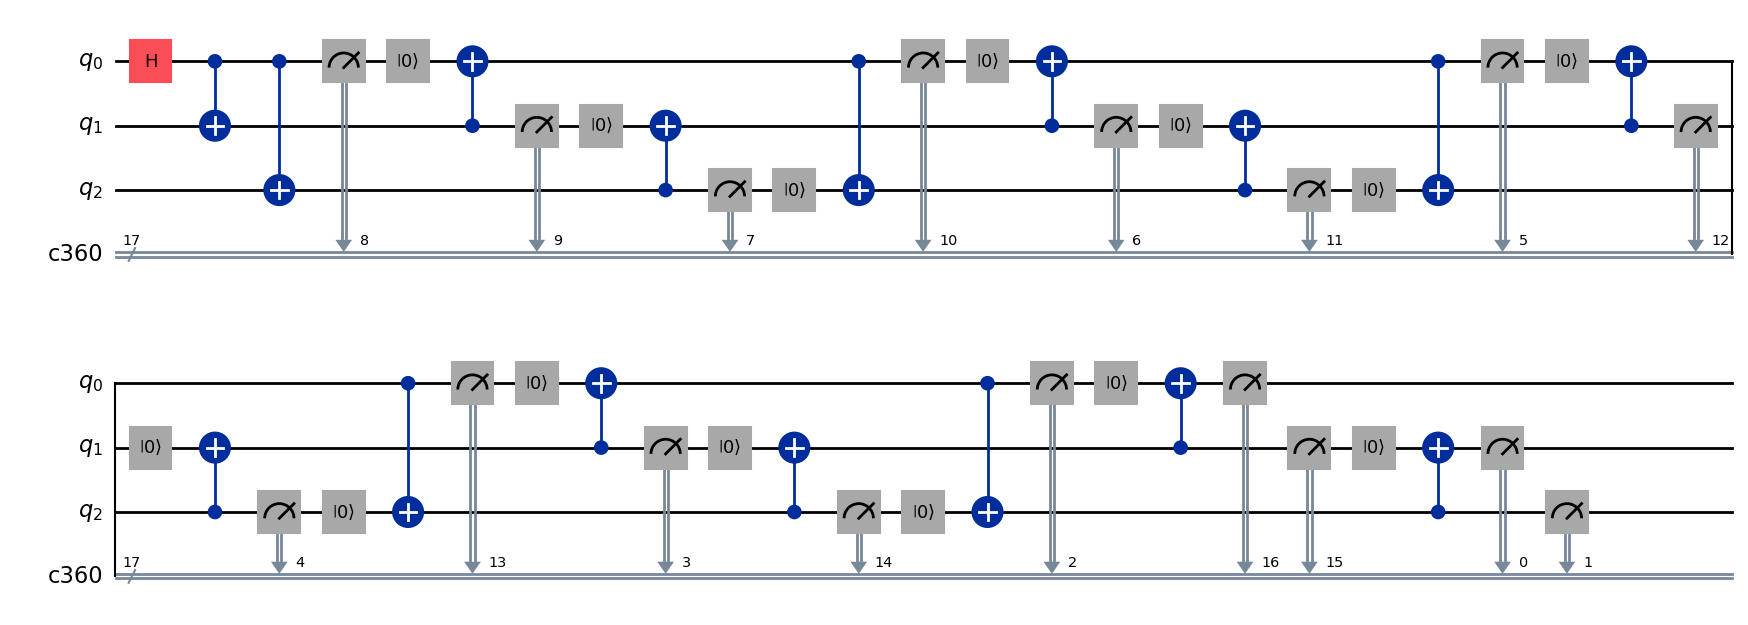

In [6]:
get_ghz_circ_dynamic_2(17)[0].draw("mpl",idle_wires=False)

threshold received in plugin is 1
threshold received in plugin is 1
threshold received in plugin is 1
threshold received in plugin is 1
threshold received in plugin is 1
threshold received in Greedy is 1
classical registers are [ClassicalRegister(17, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(17, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(17, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(17, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(17, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(17, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(17, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(17, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(17, 'cr2')]
threshold received in Greedy 

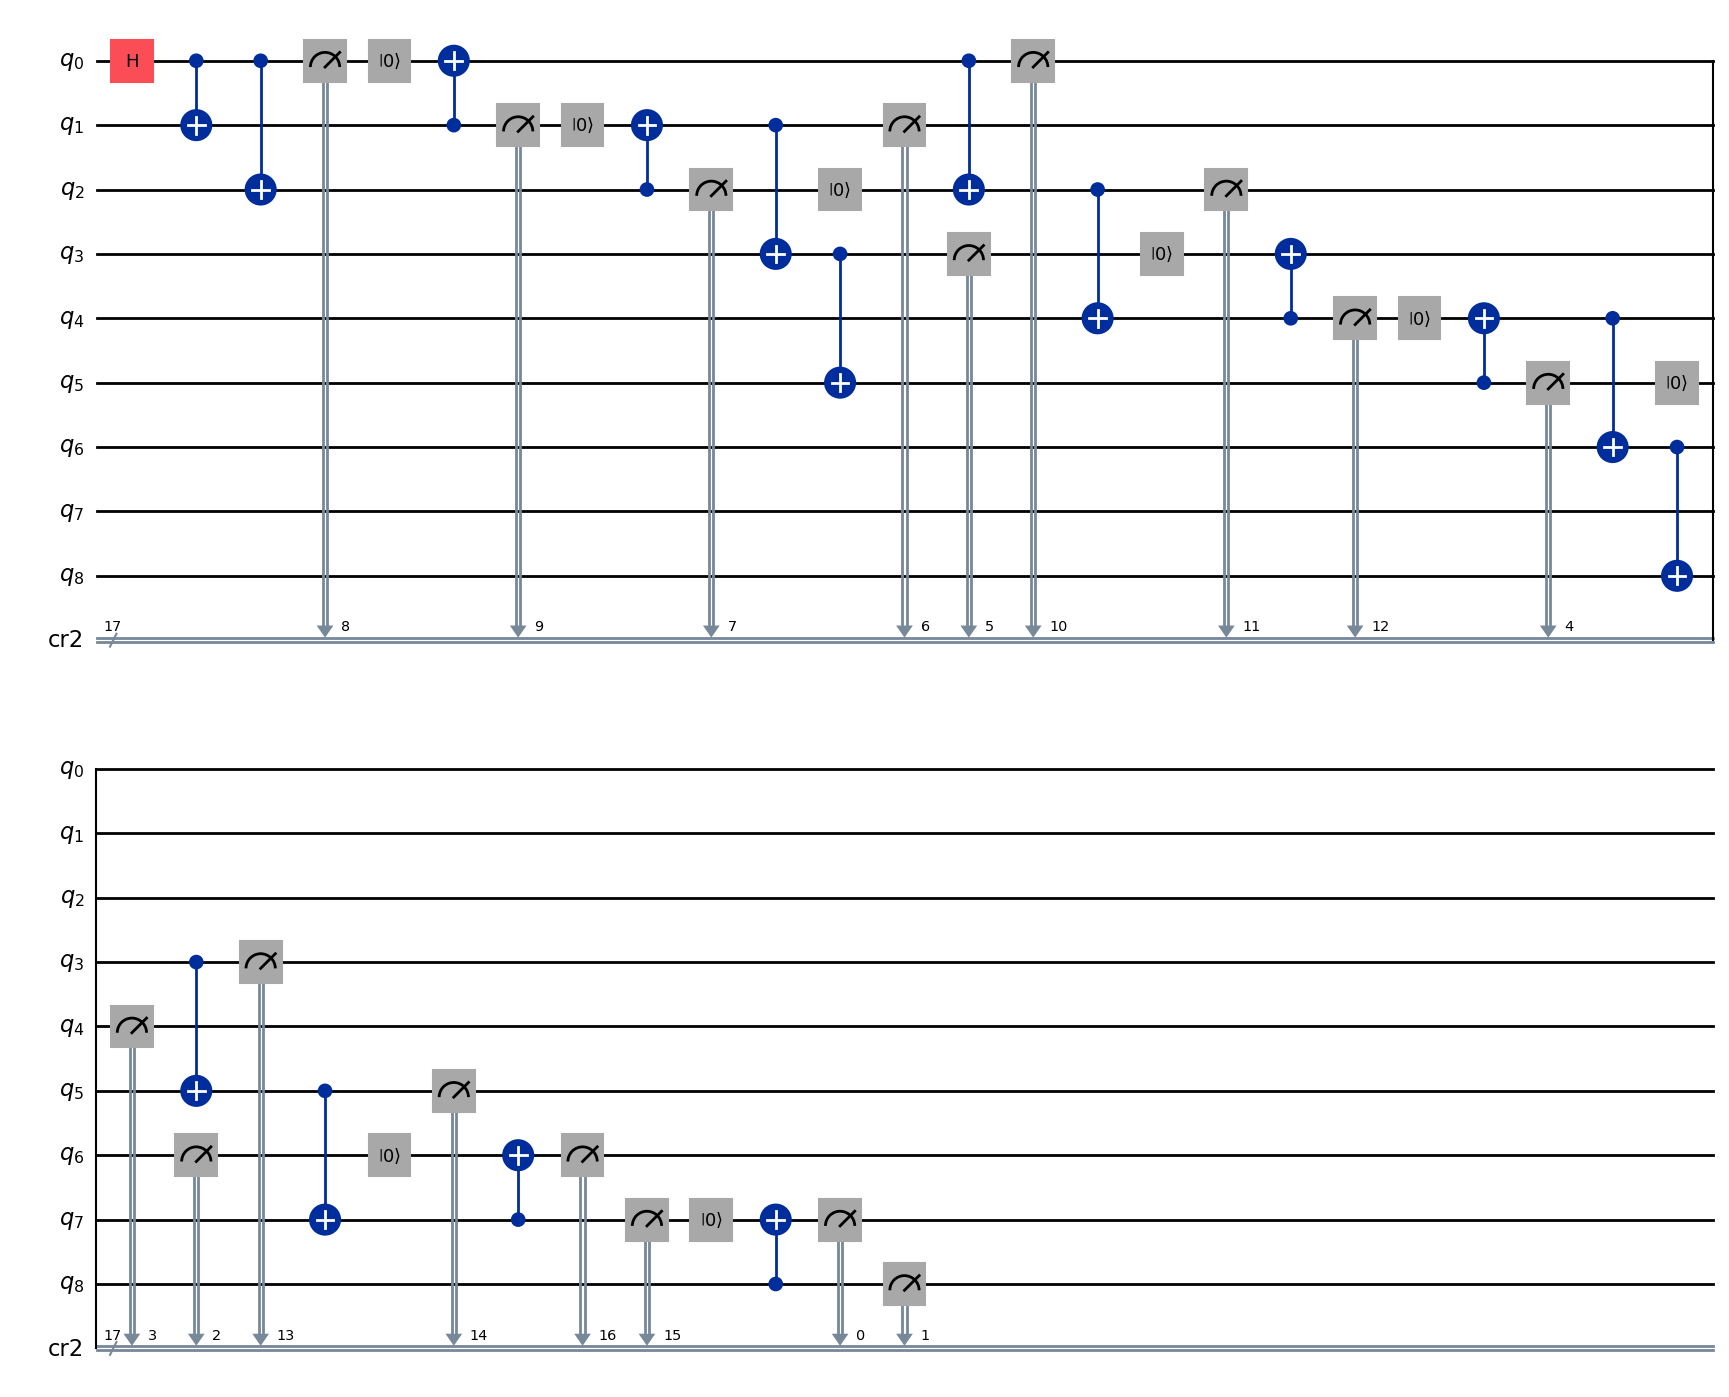

In [7]:
get_ghz_circ_dynamic_2(17)[1].draw("mpl",idle_wires=False)

In [8]:
#Ideal Simulation with AerSimulator
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler
 
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=2)
qc_transpiled_list=[]

qc_transpiled_list_ideal = pm.run(qc_list)

In [9]:
sampler = Sampler(backend=aer_sim)
result_ideal = sampler.run(qc_transpiled_list_ideal).result()

In [10]:
print(result_ideal)
len(result_ideal)

PrimitiveResult([PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(c0=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(c12=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(c

210

In [11]:
# For getting list of ideal counts (argument required for Fidelity)
counts_list_ideal=[]
k=1
for i in range(len(num_qubit_list)):  
    for j in range(copies):
        data_static = result_ideal[(7*i*copies)+(7*j)].data                 # no qubit reuse
        data_dynamic_1 = result_ideal[(7*i*copies)+((7*j)+1)].data           # qubit reuse without modification
        data_dynamic_2 = result_ideal[(7*i*copies)+((7*j)+2)].data           # qubit reuse with threshold 1
        data_dynamic_3 = result_ideal[(7*i*copies)+((7*j)+3)].data
        data_dynamic_4 = result_ideal[(7*i*copies)+((7*j)+4)].data
        data_dynamic_5 = result_ideal[(7*i*copies)+((7*j)+5)].data
        data_dynamic_6 = result_ideal[(7*i*copies)+((7*j)+6)].data

        print(data_static)
        print(data_dynamic_1)
        print(data_dynamic_2)
        
        counts_static=data_static.cr2.get_counts()
        #counts_dynamic_1=data_dynamic_1.cr2.get_counts()     # normal reuse
        counts_dynamic_2=data_dynamic_2.cr2.get_counts()      # modified reuse
        counts_dynamic_3=data_dynamic_3.cr2.get_counts()      # modified reuse
        counts_dynamic_4=data_dynamic_4.cr2.get_counts()      # modified reuse
        counts_dynamic_5=data_dynamic_5.cr2.get_counts()      # modified reuse
        counts_dynamic_6=data_dynamic_6.cr2.get_counts()      # modified reuse
        
        # Replacing 'cr2' with the appropriate attribute if needed
        dynamic_1_attr_name = f'c{12*k-12}'
        if hasattr(data_dynamic_1, dynamic_1_attr_name):
            counts_dynamic_1 = getattr(data_dynamic_1, dynamic_1_attr_name).get_counts()
        else:
            raise AttributeError(f"{dynamic_1_attr_name} not found in data_dynamic_1")
        
        counts_list_ideal.append(counts_static)             # no reuse
        counts_list_ideal.append(counts_dynamic_1)          # reuse without modification
        counts_list_ideal.append(counts_dynamic_2)         #qubit reuse 1
        counts_list_ideal.append(counts_dynamic_3)         # qubit reuse 2
        counts_list_ideal.append(counts_dynamic_4)
        counts_list_ideal.append(counts_dynamic_5)
        counts_list_ideal.append(counts_dynamic_6)
        k=k+1

DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(c0=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(c12=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(c24=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(c36=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(c48=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits

In [12]:
counts_list_ideal[2]

{'1111111111111': 512, '0000000000000': 512}

In [13]:
# noisy simulation circuit list
service = QiskitRuntimeService()
real_backend = service.backend("ibm_brisbane")
aer = AerSimulator.from_backend(real_backend)
pm = generate_preset_pass_manager(optimization_level=2, backend=aer)
qc_transpiled_list = pm.run(qc_list)

In [14]:
sampler = Sampler(backend=aer)
result_real = sampler.run(qc_transpiled_list).result()

In [15]:
print(result_real)
len(result_real)

PrimitiveResult([PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(c0=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(c12=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(c

210

In [16]:
# For getting list of noisy simulation counts (argument required for Fidelity)
counts_list_real=[]
k=1
for i in range(len(num_qubit_list)):  
    for j in range(copies):
        data_static = result_real[(7*i*copies)+(7*j)].data    
        data_dynamic_1 = result_real[(7*i*copies)+((7*j)+1)].data 
        data_dynamic_2 = result_real[(7*i*copies)+((7*j)+2)].data
        data_dynamic_3 = result_real[(7*i*copies)+((7*j)+3)].data
        data_dynamic_4 = result_real[(7*i*copies)+((7*j)+4)].data
        data_dynamic_5 = result_real[(7*i*copies)+((7*j)+5)].data
        data_dynamic_6 = result_real[(7*i*copies)+((7*j)+6)].data

        print(data_static)
        print(data_dynamic_1)
        print(data_dynamic_2)
        
        counts_static=data_static.cr2.get_counts()
        #counts_dynamic_1=data_dynamic_1.cr2.get_counts()     # normal reuse
        counts_dynamic_2=data_dynamic_2.cr2.get_counts()      # modified reuse
        counts_dynamic_3=data_dynamic_3.cr2.get_counts()      # modified reuse
        counts_dynamic_4=data_dynamic_4.cr2.get_counts()      # modified reuse
        counts_dynamic_5=data_dynamic_5.cr2.get_counts()      # modified reuse
        counts_dynamic_6=data_dynamic_6.cr2.get_counts()      # modified reuse
        
        # Replacing 'cr2' with the appropriate attribute if needed
        dynamic_1_attr_name = f'c{12*k-12}'
        if hasattr(data_dynamic_1, dynamic_1_attr_name):
            counts_dynamic_1 = getattr(data_dynamic_1, dynamic_1_attr_name).get_counts()
        else:
            raise AttributeError(f"{dynamic_1_attr_name} not found in data_dynamic_1")
        
        counts_list_real.append(counts_static)
        counts_list_real.append(counts_dynamic_1)
        counts_list_real.append(counts_dynamic_2)
        counts_list_real.append(counts_dynamic_3)
        counts_list_real.append(counts_dynamic_4)
        counts_list_real.append(counts_dynamic_5)
        counts_list_real.append(counts_dynamic_6)
        k=k+1

DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(c0=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(c12=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(c24=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(c36=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(c48=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits

In [17]:
#Calculation of lists of Fidelity mean and std deviation of real hardware simulation in ibm_sherbrooke
import statistics
from qiskit.quantum_info.analysis import hellinger_fidelity
# We will create 4 lists of Fidelities, for storing mean, std deviation of Fidelity, of copies of a circuit for fixed no of logical qubits
 
Fidelity_mean_static_sherbrooke=[]
Fidelity_mean_dynamic_1_sherbrooke=[]
Fidelity_mean_dynamic_2_sherbrooke=[]
Fidelity_mean_dynamic_3_sherbrooke=[]
Fidelity_mean_dynamic_4_sherbrooke=[]
Fidelity_mean_dynamic_5_sherbrooke=[]
Fidelity_mean_dynamic_6_sherbrooke=[]

Fidelity_std_static_sherbrooke=[]
Fidelity_std_dynamic_1_sherbrooke=[]
Fidelity_std_dynamic_2_sherbrooke=[]
Fidelity_std_dynamic_3_sherbrooke=[]
Fidelity_std_dynamic_4_sherbrooke=[]
Fidelity_std_dynamic_5_sherbrooke=[]
Fidelity_std_dynamic_6_sherbrooke=[]

Fidelity_copies_static_sherbrooke=[]
Fidelity_copies_dynamic_1_sherbrooke=[]
Fidelity_copies_dynamic_2_sherbrooke=[]
Fidelity_copies_dynamic_3_sherbrooke=[]
Fidelity_copies_dynamic_4_sherbrooke=[]
Fidelity_copies_dynamic_5_sherbrooke=[]
Fidelity_copies_dynamic_6_sherbrooke=[]

for i in range(len(num_qubit_list)):
    
    for j in range(copies):
        
        Fidelity_static= hellinger_fidelity(counts_list_ideal[(7*i*copies)+(7*j)], counts_list_real[(7*i*copies)+(7*j)])
        Fidelity_dynamic_1=hellinger_fidelity(counts_list_ideal[(7*i*copies)+((7*j)+1)], counts_list_real[(7*i*copies)+((7*j)+1)])
        Fidelity_dynamic_2=hellinger_fidelity(counts_list_ideal[(7*i*copies)+((7*j)+2)], counts_list_real[(7*i*copies)+((7*j)+2)])
        Fidelity_dynamic_3=hellinger_fidelity(counts_list_ideal[(7*i*copies)+((7*j)+3)], counts_list_real[(7*i*copies)+((7*j)+3)])
        Fidelity_dynamic_4=hellinger_fidelity(counts_list_ideal[(7*i*copies)+((7*j)+4)], counts_list_real[(7*i*copies)+((7*j)+4)])
        Fidelity_dynamic_5=hellinger_fidelity(counts_list_ideal[(7*i*copies)+((7*j)+5)], counts_list_real[(7*i*copies)+((7*j)+5)])
        Fidelity_dynamic_6=hellinger_fidelity(counts_list_ideal[(7*i*copies)+((7*j)+6)], counts_list_real[(7*i*copies)+((7*j)+6)])
        
        Fidelity_copies_static_sherbrooke.append(Fidelity_static)
        Fidelity_copies_dynamic_1_sherbrooke.append(Fidelity_dynamic_1)
        Fidelity_copies_dynamic_2_sherbrooke.append(Fidelity_dynamic_2)
        Fidelity_copies_dynamic_3_sherbrooke.append(Fidelity_dynamic_3)
        Fidelity_copies_dynamic_4_sherbrooke.append(Fidelity_dynamic_4)
        Fidelity_copies_dynamic_5_sherbrooke.append(Fidelity_dynamic_5)
        Fidelity_copies_dynamic_6_sherbrooke.append(Fidelity_dynamic_6)

    
    Fidelity_mean_static_sherbrooke.append(statistics.mean(Fidelity_copies_static_sherbrooke))
    Fidelity_mean_dynamic_1_sherbrooke.append(statistics.mean(Fidelity_copies_dynamic_1_sherbrooke))
    Fidelity_mean_dynamic_2_sherbrooke.append(statistics.mean(Fidelity_copies_dynamic_2_sherbrooke))
    Fidelity_mean_dynamic_3_sherbrooke.append(statistics.mean(Fidelity_copies_dynamic_3_sherbrooke))
    Fidelity_mean_dynamic_4_sherbrooke.append(statistics.mean(Fidelity_copies_dynamic_4_sherbrooke))
    Fidelity_mean_dynamic_5_sherbrooke.append(statistics.mean(Fidelity_copies_dynamic_5_sherbrooke))
    Fidelity_mean_dynamic_6_sherbrooke.append(statistics.mean(Fidelity_copies_dynamic_6_sherbrooke))
    
    Fidelity_std_static_sherbrooke.append(statistics.stdev(Fidelity_copies_static_sherbrooke))
    Fidelity_std_dynamic_1_sherbrooke.append(statistics.stdev(Fidelity_copies_dynamic_1_sherbrooke))
    Fidelity_std_dynamic_2_sherbrooke.append(statistics.stdev(Fidelity_copies_dynamic_2_sherbrooke))
    Fidelity_std_dynamic_3_sherbrooke.append(statistics.stdev(Fidelity_copies_dynamic_3_sherbrooke))
    Fidelity_std_dynamic_4_sherbrooke.append(statistics.stdev(Fidelity_copies_dynamic_4_sherbrooke))
    Fidelity_std_dynamic_5_sherbrooke.append(statistics.stdev(Fidelity_copies_dynamic_5_sherbrooke))
    Fidelity_std_dynamic_6_sherbrooke.append(statistics.stdev(Fidelity_copies_dynamic_6_sherbrooke))
    
    Fidelity_copies_static_sherbrooke.clear()
    Fidelity_copies_dynamic_1_sherbrooke.clear()
    Fidelity_copies_dynamic_2_sherbrooke.clear()
    Fidelity_copies_dynamic_3_sherbrooke.clear()
    Fidelity_copies_dynamic_4_sherbrooke.clear()
    Fidelity_copies_dynamic_5_sherbrooke.clear()
    Fidelity_copies_dynamic_6_sherbrooke.clear()

[0.7667971336474524, 0.7283767196254953, 0.7196649949124403, 0.700474572139047, 0.6768199973199226]
[0.7941398625987177, 0.7807362067559248, 0.7583862576470746, 0.7556590106288242, 0.735511576944057]
[0.7189842765347907, 0.7023158712254628, 0.6546936546597055, 0.6296987085552906, 0.6079316718462875]
[0.01464598620195396, 0.02041652271059345, 0.018095872781241064, 0.020283508162674647, 0.012062358070931322]
[0.7941398625987177, 0.7807362067559248, 0.7583862576470746, 0.7556590106288242, 0.735511576944057]
[0.022080930893204585, 0.01924449421075913, 0.033398598340148404, 0.01960250584072933, 0.03857714857083581]


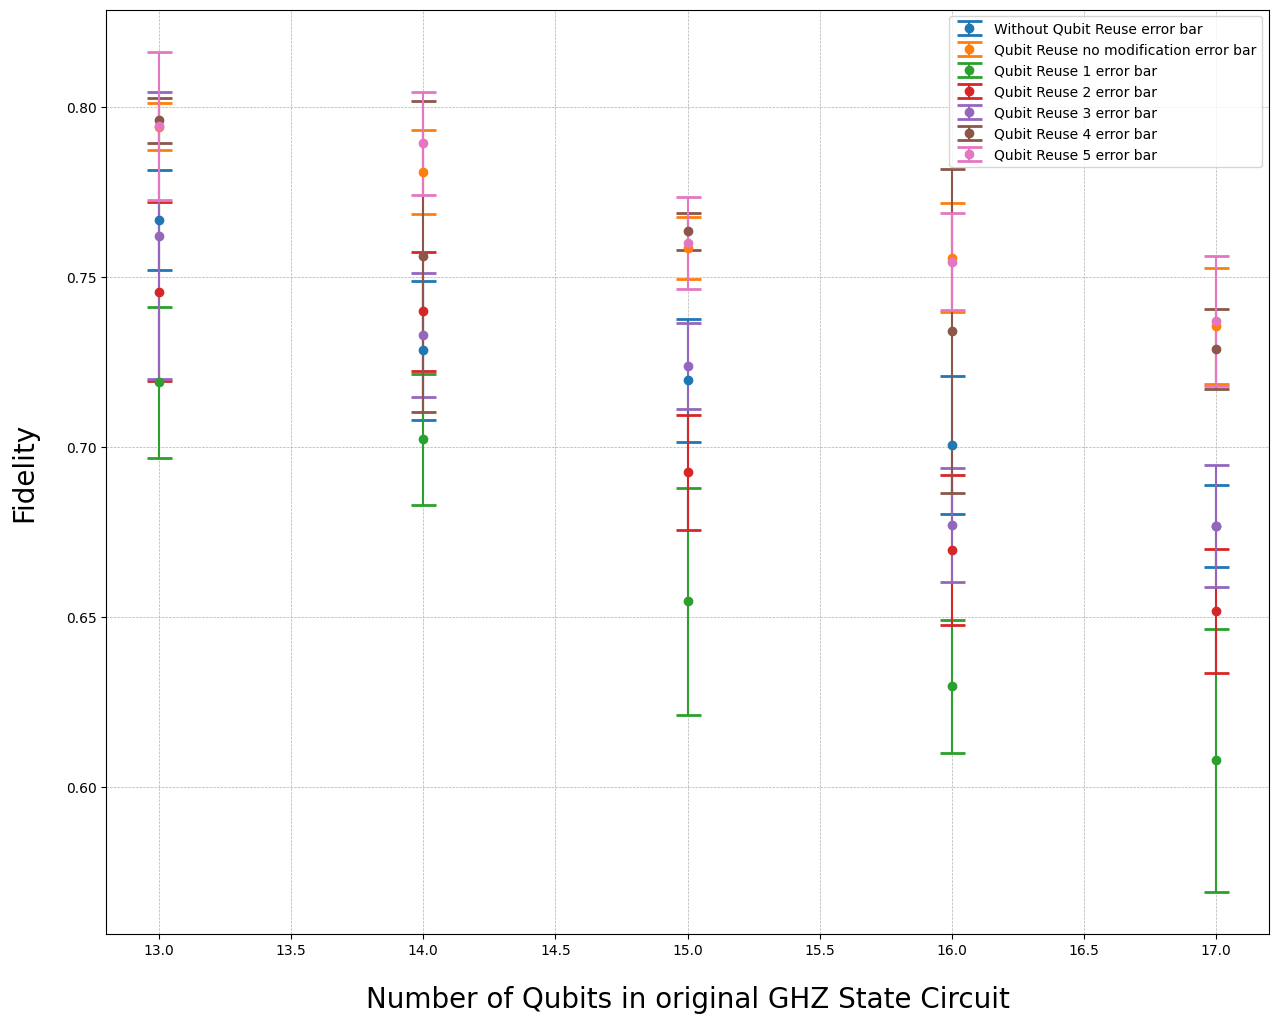

In [23]:
# Graph plotting
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
#figure(figsize=(16,12), dpi=180)
fig, ax1 = plt.subplots(1, 1, figsize=(15,12))

# Create  data.
ax1.set_xlabel('Number of Qubits in original GHZ State Circuit',fontsize=20,labelpad=20)
ax1.set_ylabel('Fidelity',fontsize=20,labelpad=20)
#ax1.set_title('ibm_brisbane Aer Simulation')

x1 = num_qubit_list
y1_static = Fidelity_mean_static_sherbrooke
y1_dynamic_1 = Fidelity_mean_dynamic_1_sherbrooke
y1_dynamic_2 = Fidelity_mean_dynamic_2_sherbrooke
y1_dynamic_3 = Fidelity_mean_dynamic_3_sherbrooke
y1_dynamic_4 = Fidelity_mean_dynamic_4_sherbrooke
y1_dynamic_5 = Fidelity_mean_dynamic_5_sherbrooke
y1_dynamic_6 = Fidelity_mean_dynamic_6_sherbrooke

print(y1_static)
print(y1_dynamic_1)
print(y1_dynamic_2)

y_error_static =Fidelity_std_static_sherbrooke
y_error_dynamic_1 =Fidelity_std_dynamic_1_sherbrooke
y_error_dynamic_2 =Fidelity_std_dynamic_2_sherbrooke
y_error_dynamic_3 =Fidelity_std_dynamic_3_sherbrooke
y_error_dynamic_4 =Fidelity_std_dynamic_4_sherbrooke
y_error_dynamic_5 =Fidelity_std_dynamic_5_sherbrooke
y_error_dynamic_6 =Fidelity_std_dynamic_6_sherbrooke

print(y_error_static)
print(y1_dynamic_1)
print(y_error_dynamic_2)
"""
ax1.plot(x1, y1_static, 'o-',label='Without Qubit Reuse')
ax1.plot(x1, y1_dynamic_1, 'o-',label='Qubit Reuse no modification')
ax1.plot(x1, y1_dynamic_2, 'o-',label='Qubit Reuse threshold= 1')
ax1.plot(x1, y1_dynamic_3, 'o-',label='Qubit Reuse threshold= 2')
ax1.plot(x1, y1_dynamic_4, 'o-',label='Qubit Reuse threshold= 3')
ax1.plot(x1, y1_dynamic_5, 'o-',label='Qubit Reuse threshold= 4')
ax1.plot(x1, y1_dynamic_6, 'o-',label='Qubit Reuse threshold= 5')
"""
ax1.errorbar(x1, y1_static,
			yerr = y_error_static, label='Without Qubit Reuse error bar',
			fmt ='o',capsize=9, capthick=2)

ax1.errorbar(x1, y1_dynamic_1,
			yerr = y_error_dynamic_1, label='Qubit Reuse no modification error bar',
			fmt ='o',capsize=9, capthick=2)

ax1.errorbar(x1, y1_dynamic_2,
			yerr = y_error_dynamic_2, label='Qubit Reuse 1 error bar',
			fmt ='o',capsize=9, capthick=2)
ax1.errorbar(x1, y1_dynamic_3,
			yerr = y_error_dynamic_3, label='Qubit Reuse 2 error bar',
			fmt ='o',capsize=9, capthick=2)
ax1.errorbar(x1, y1_dynamic_4,
			yerr = y_error_dynamic_4, label='Qubit Reuse 3 error bar',
			fmt ='o',capsize=9, capthick=2)
ax1.errorbar(x1, y1_dynamic_5,
			yerr = y_error_dynamic_5, label='Qubit Reuse 4 error bar',
			fmt ='o',capsize=9, capthick=2)
ax1.errorbar(x1, y1_dynamic_6,
			yerr = y_error_dynamic_6, label='Qubit Reuse 5 error bar',
			fmt ='o',capsize=9, capthick=2)

ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend()
plt.show()